# Credit Card Product Recommendation System

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

from sklearn.decomposition import PCA

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
def load_data(filepath):
    if file_path[-3:] == 'csv':
        return pd.read_csv(file_path)
    elif file_path[-3:] == 'txt':
        return pd.read_csv(file_path, delimiter='\t')
    elif file_path[-4:] == 'json':
        return pd.read_json(file_path)
    elif file_path[-4:] == 'xlsx':
        return pd.read_excel(file_path)
    else:
        print("An error occured, use ['csv', 'xlsx', 'txt', 'json'] files only")

In [3]:
file_path = r"C:\Users\Atharva\Desktop\rxib\ML_Projects\Credit_Card_Customer_Segmentation_KMeans\BankChurners.xlsx"
data = load_data(file_path)
data.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


In [4]:
def drop_cols(df, cols_to_remove):
    df.drop(cols_to_remove, axis=1, inplace=True)

In [5]:
drop_cols(data, ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'CLIENTNUM','Attrition_Flag'])

### View Data

In [6]:
def view_data(df):
    print("First 5 rows of the data:")
    display(df.head())
    
    print("Shape of the data:")
    display(df.shape)
    
    print("Statistical description of the data")
    display(df.describe())
    
    print("Information of the data")
    display(df.info())
    
    print("Null Values in the data")
    display(df.isna().sum())

In [7]:
view_data(data)

First 5 rows of the data:


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Shape of the data:


(10127, 19)

Statistical description of the data


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Information of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-n

None

Null Values in the data


Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Customer Activity

In [8]:
data['Months_Active_12_mon'] = 12 - data['Months_Inactive_12_mon']

In [9]:
data['Contacts_per_Month'] = data['Contacts_Count_12_mon'] / data['Months_Active_12_mon']+1

### Card Usage Behaviour

In [10]:
data['card_usage_count_per_month'] = data['Total_Trans_Ct'] / data['Months_on_book']+1

In [11]:
data['card_usage_amount_per_month'] = data['Total_Trans_Amt'] / data['Months_on_book']+1

In [12]:
data['Remaining_Credit'] = data['Credit_Limit'] - data['Total_Revolving_Bal']

### Age based features

In [13]:
data['Dependents_by_Age'] = (data['Dependent_count']+1 )/ data['Customer_Age']

### Transaction Amount Features

In [14]:
# Transaction intensity: average transaction amount per transaction
data['Amount_Per_Transaction'] = data['Total_Trans_Amt'] / data['Total_Trans_Ct']

In [15]:
# Transaction per month
data['Trans_Amount_per_Month'] = data['Total_Trans_Amt'] / data['Months_on_book']+1

### Transaction Count Features

In [16]:
# Average transactions per month on book
data['No_of_trans_per_Month'] = data['Total_Trans_Ct'] / data['Months_on_book']+1

### Credit Utilization

In [17]:
# Credit utilization ratio (percentage)
data['Credit_Utilization_Percentage'] = (data['Total_Revolving_Bal'] / data['Credit_Limit']) * 100

### Customer Relationship Features


In [18]:
# Relationship intensity
data['Relationship_Intensity'] = data['Total_Relationship_Count'] / data['Months_on_book']+1

# Contact frequency
data['Contact_Rate'] = data['Contacts_Count_12_mon'] / 12

### Spending Pattern Features


In [19]:
# Average spending per relationship
data['Spending_per_Relationship'] = data['Total_Trans_Amt'] / data['Total_Relationship_Count']+1

In [20]:
data['Age_to_Credit_Ratio'] = data['Customer_Age'] / data['Credit_Limit']

In [21]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Months_Active_12_mon,Contacts_per_Month,card_usage_count_per_month,card_usage_amount_per_month,Remaining_Credit,Dependents_by_Age,Amount_Per_Transaction,Trans_Amount_per_Month,No_of_trans_per_Month,Credit_Utilization_Percentage,Relationship_Intensity,Contact_Rate,Spending_per_Relationship,Age_to_Credit_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,11,1.272727,2.076923,30.333333,11914.0,0.088889,27.238095,30.333333,2.076923,6.122449,1.128205,0.250000,229.800000,0.003546
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,11,1.181818,1.750000,30.340909,7392.0,0.122449,39.121212,30.340909,1.750000,10.465116,1.136364,0.166667,216.166667,0.005935
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,11,1.000000,1.555556,53.416667,3418.0,0.078431,94.350000,53.416667,1.555556,0.000000,1.111111,0.000000,472.750000,0.014921
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,8,1.125000,1.588235,35.441176,796.0,0.125000,58.550000,35.441176,1.588235,75.973438,1.088235,0.083333,391.333333,0.012074
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,11,1.000000,2.333333,39.857143,4716.0,0.100000,29.142857,39.857143,2.333333,0.000000,1.238095,0.000000,164.200000,0.008482


### Data Pre-Processing

In [22]:
cat_cols = ['Gender', 'Dependent_count', 'Education_Level','Marital_Status', 'Income_Category','Card_Category']

In [23]:
encoded_data = data.copy()

In [24]:
le = LabelEncoder()
for col in cat_cols:
    encoded_data[col] = le.fit_transform(encoded_data[col])

In [25]:
scaled_data = encoded_data.copy()

scaler = StandardScaler()
num_cols = scaled_data.select_dtypes(include=['number']).columns.to_list()
scaled_data[num_cols] = scaler.fit_transform(scaled_data[num_cols])
scaled_data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Months_Active_12_mon,Contacts_per_Month,card_usage_count_per_month,card_usage_amount_per_month,Remaining_Credit,Dependents_by_Age,Amount_Per_Transaction,Trans_Amount_per_Month,No_of_trans_per_Month,Credit_Utilization_Percentage,Relationship_Intensity,Contact_Rate,Spending_per_Relationship,Age_to_Credit_Ratio
0,-0.165406,1.059956,0.503368,-0.052637,-0.628128,-0.574182,-0.259473,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,1.327136,0.123757,-0.927917,-0.878687,0.488971,0.458371,-1.339801,-0.878687,-0.927917,-0.775069,0.257652,0.492404,-0.611994,-0.913340
1,0.333570,-0.943436,2.043199,-0.597678,0.727306,0.755053,-0.259473,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,1.327136,-0.623627,-1.286412,-0.878621,-0.008486,1.533378,-0.889732,-0.878621,-1.286412,-0.617541,0.396148,-0.411616,-0.617322,-0.660315
2,0.583058,1.059956,0.503368,-0.597678,-0.628128,0.090436,-0.259473,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,1.327136,-2.118395,-1.499635,-0.679205,-0.445658,0.123392,1.202038,-0.679205,-1.499635,-0.997158,-0.032530,-2.219655,-0.517036,0.291304
3,-0.789126,-0.943436,1.273283,-0.052637,2.082739,0.755053,-0.259473,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,-1.641478,-1.090742,-1.463799,-0.834546,-0.734100,1.615093,-0.153874,-0.834546,-1.463799,1.758743,-0.420862,-1.315636,-0.548858,-0.010234
4,-0.789126,1.059956,0.503368,1.037447,-0.628128,-0.574182,-0.259473,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,1.327136,-2.118395,-0.646745,-0.796384,-0.302868,0.814285,-1.267659,-0.796384,-0.646745,-0.997158,2.123108,-2.219655,-0.637634,-0.390618


In [26]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_df = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,10127.0,0.000000e+00,2.640100,-5.011241,-1.657358,-0.501431,0.766346,16.169464
col2,10127.0,4.490445e-17,2.178840,-7.284981,-1.670849,-0.225008,1.326529,7.587379
col3,10127.0,-4.490445e-17,1.762514,-5.826856,-1.193098,-0.044406,1.127611,7.804348


### K Means

In [27]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed:


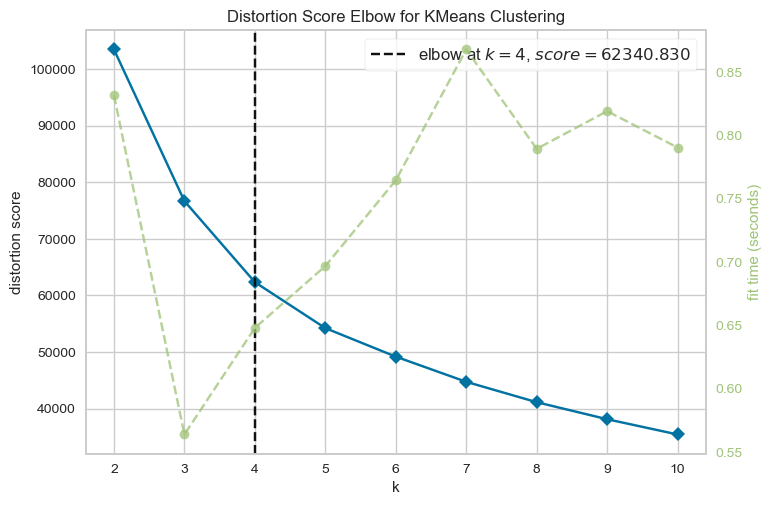

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

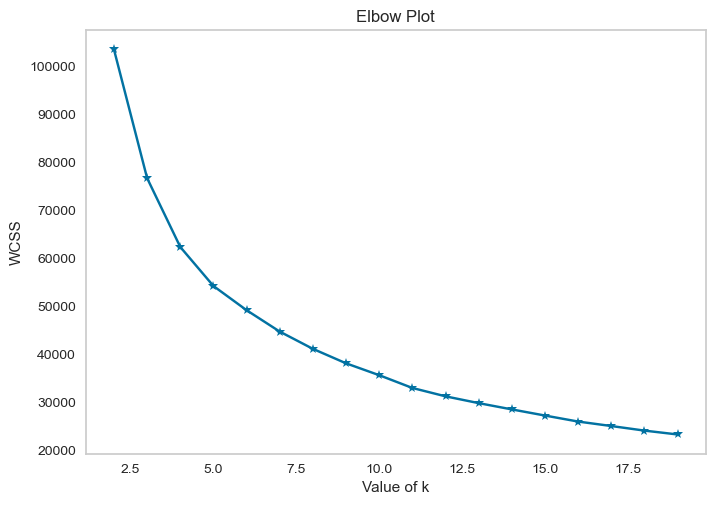

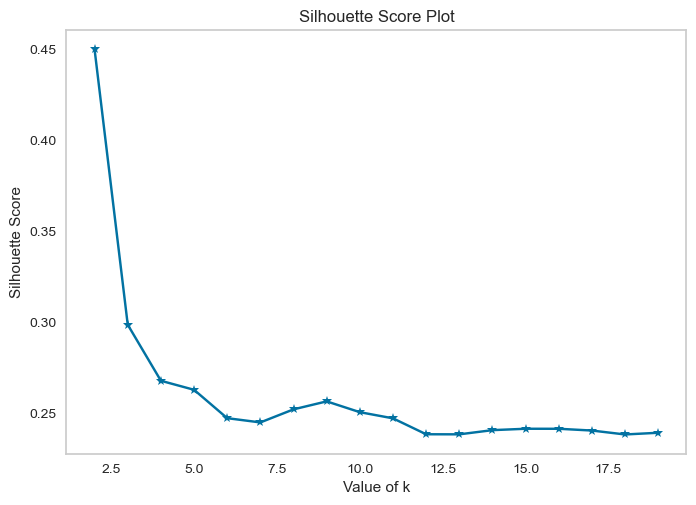

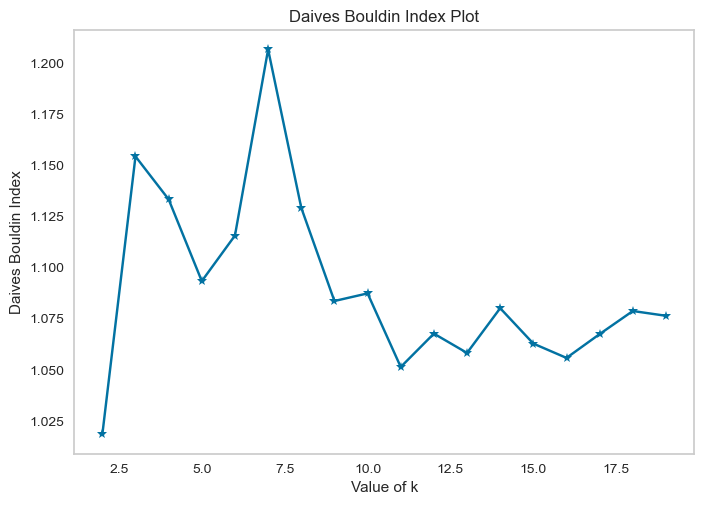

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

k_range = range(2,20)

wcss = []
ss = []
dbi = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(PCA_df)
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(PCA_df, kmeans.labels_))
    dbi.append(davies_bouldin_score(PCA_df, kmeans.labels_))
    
plt.plot(k_range, wcss, marker = '*');
plt.xlabel("Value of k");
plt.ylabel("WCSS");
plt.title("Elbow Plot");
plt.grid();
plt.show();

plt.plot(k_range, ss, marker = '*');
plt.xlabel("Value of k");
plt.ylabel("Silhouette Score");
plt.title("Silhouette Score Plot");
plt.grid();
plt.show();

plt.plot(k_range, dbi, marker = '*');
plt.xlabel("Value of k");
plt.ylabel("Daives Bouldin Index");
plt.title("Daives Bouldin Index Plot");
plt.grid();
plt.show();

### Agglomerative Clustering

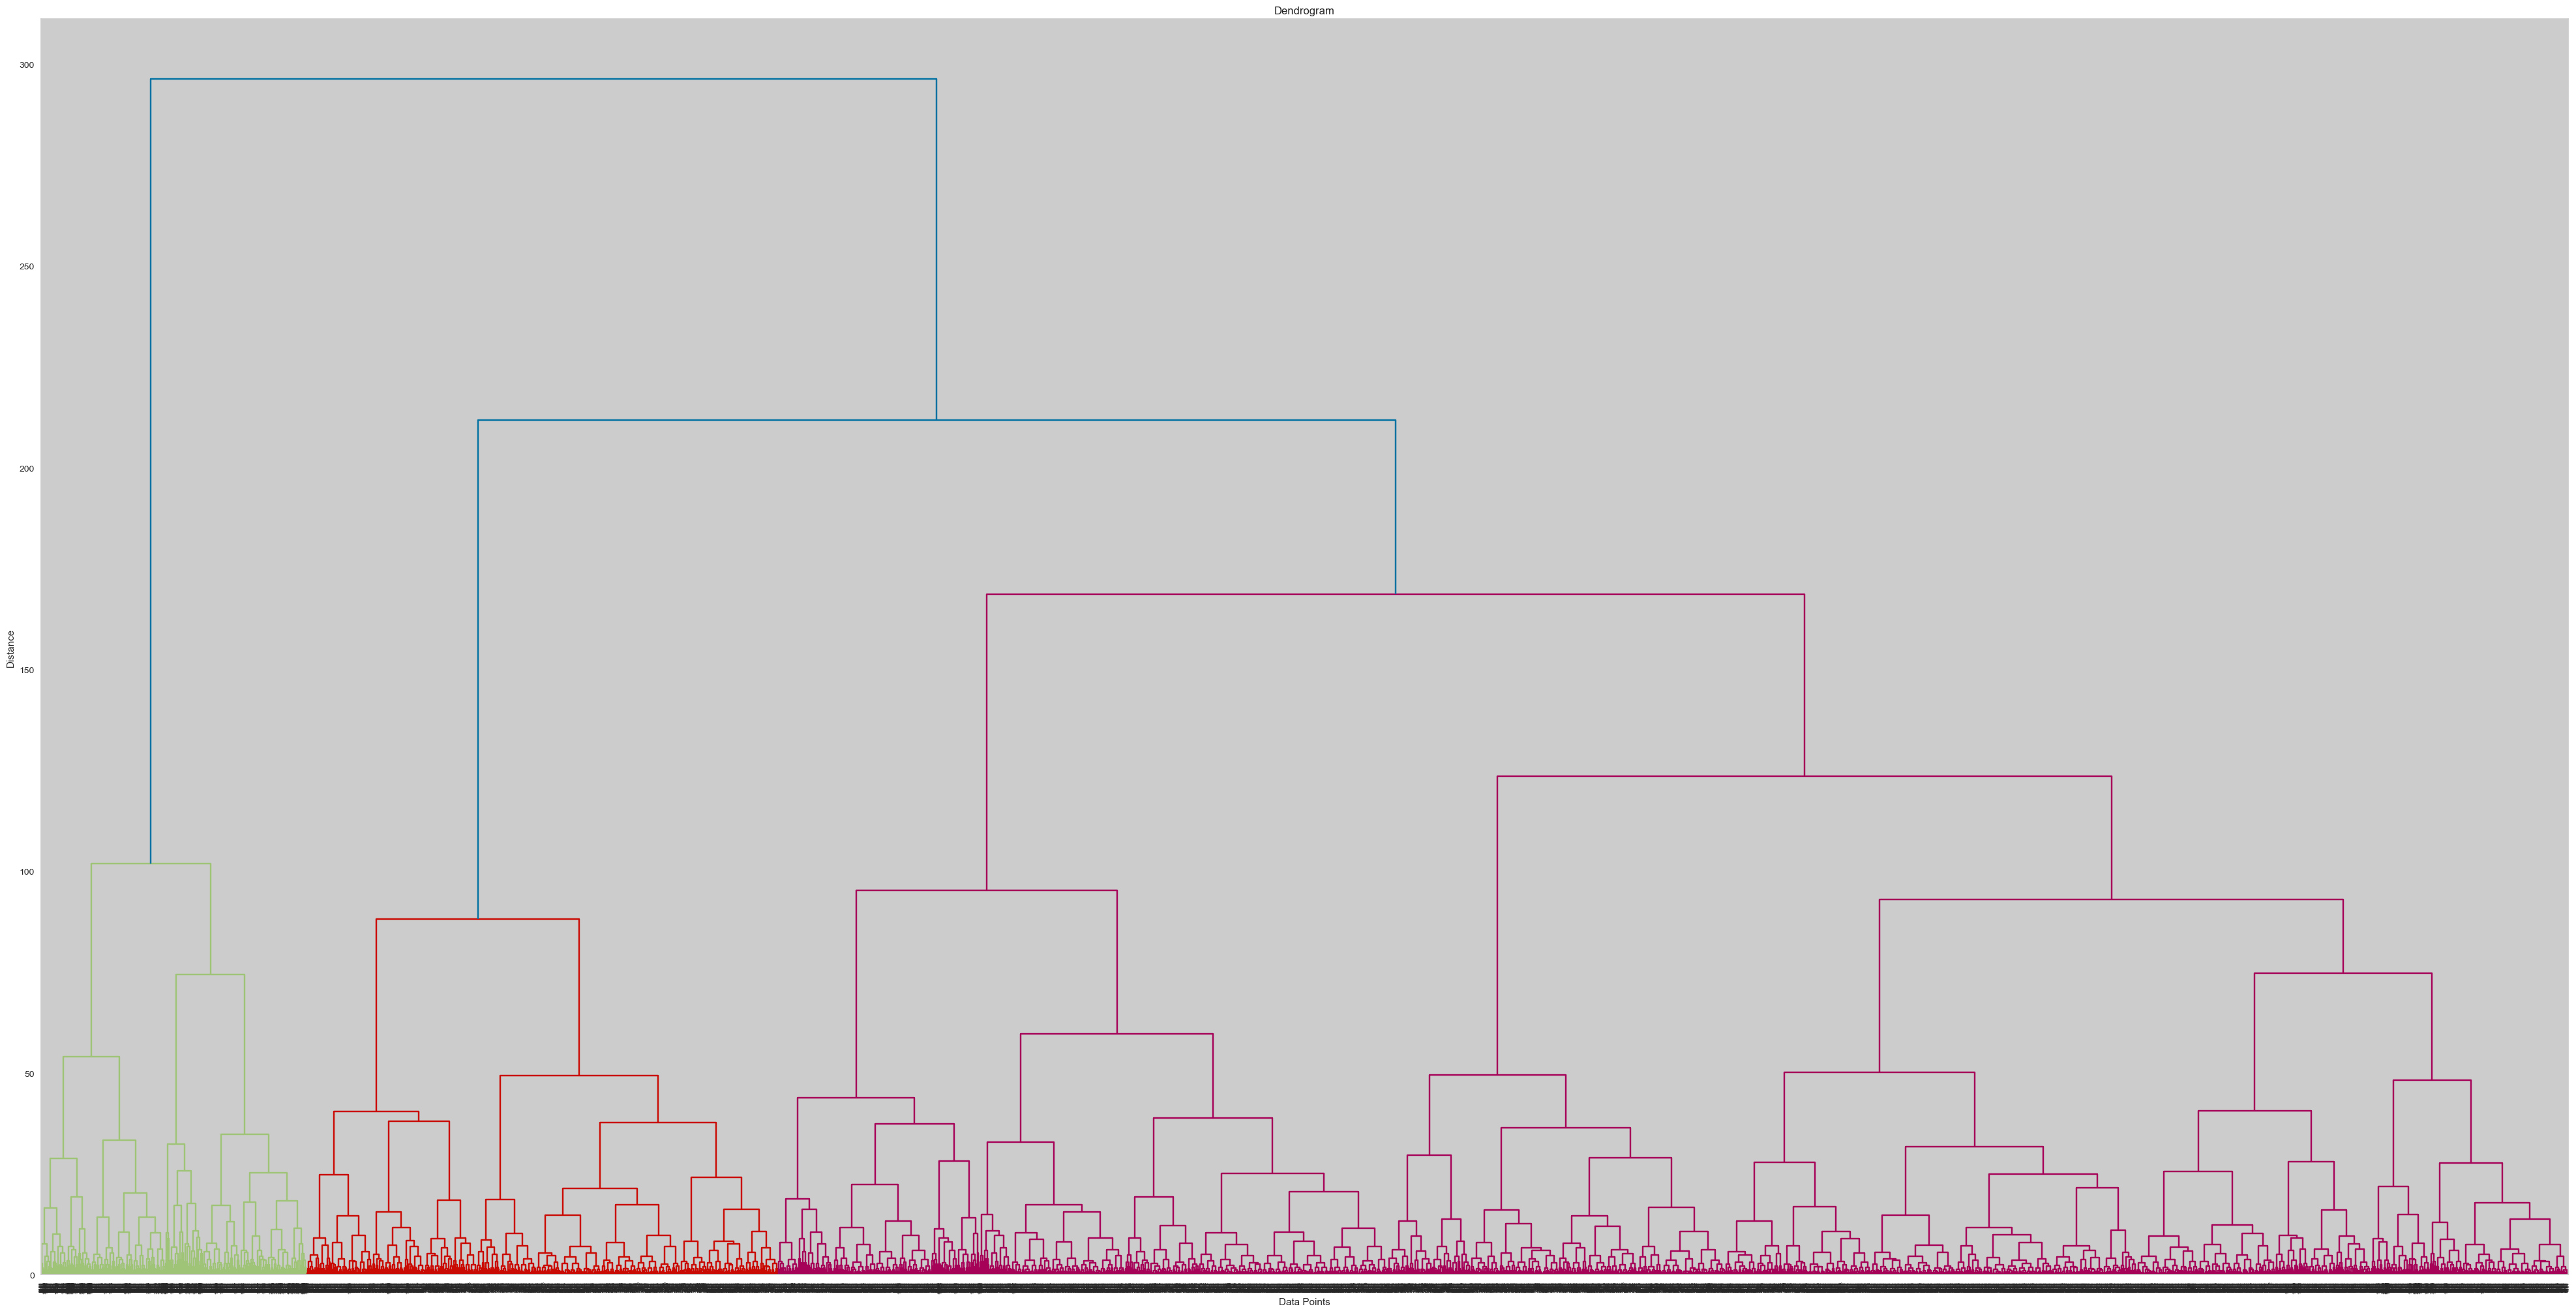

In [30]:
linkage_matrix = linkage(PCA_df, method = 'ward');
plt.figure(figsize = (50,25));
dendrogram(linkage_matrix);
plt.title("Dendrogram");
plt.xlabel("Data Points");
plt.ylabel("Distance");

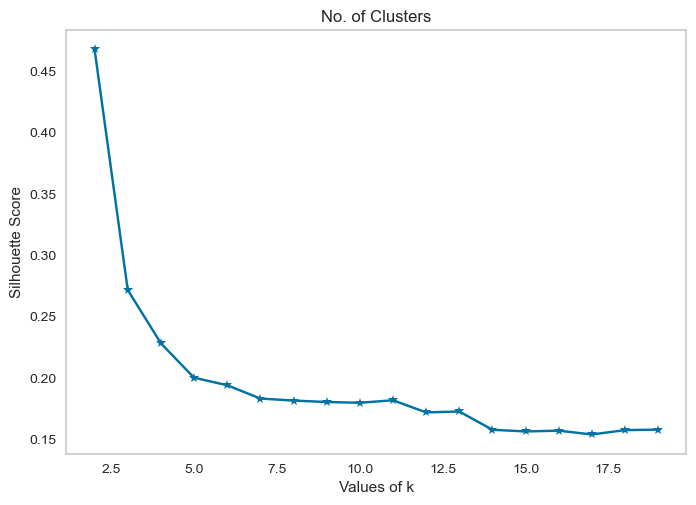

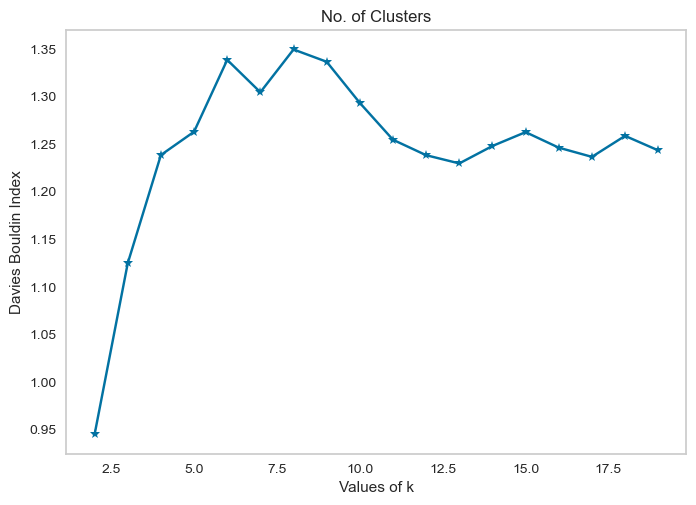

In [31]:
agglo_ss = []
dbi_ss = []

k_range = range(2, 20)

for k in k_range:
    agglo = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
    clusters = agglo.fit_predict(PCA_df)
    agglo_ss.append(silhouette_score(PCA_df, clusters))
    dbi_ss.append(davies_bouldin_score(PCA_df, clusters))
    
plt.plot(k_range, agglo_ss, marker = '*');
plt.title("No. of Clusters");
plt.xlabel("Values of k");
plt.ylabel("Silhouette Score");  
plt.grid();
plt.show();

plt.plot(k_range, dbi_ss, marker = '*');
plt.title("No. of Clusters");
plt.xlabel("Values of k");
plt.ylabel("Davies Bouldin Index");
plt.grid();
plt.show();

### Divisive Clustering

In [32]:
distance_matrix = pdist(scaled_data)

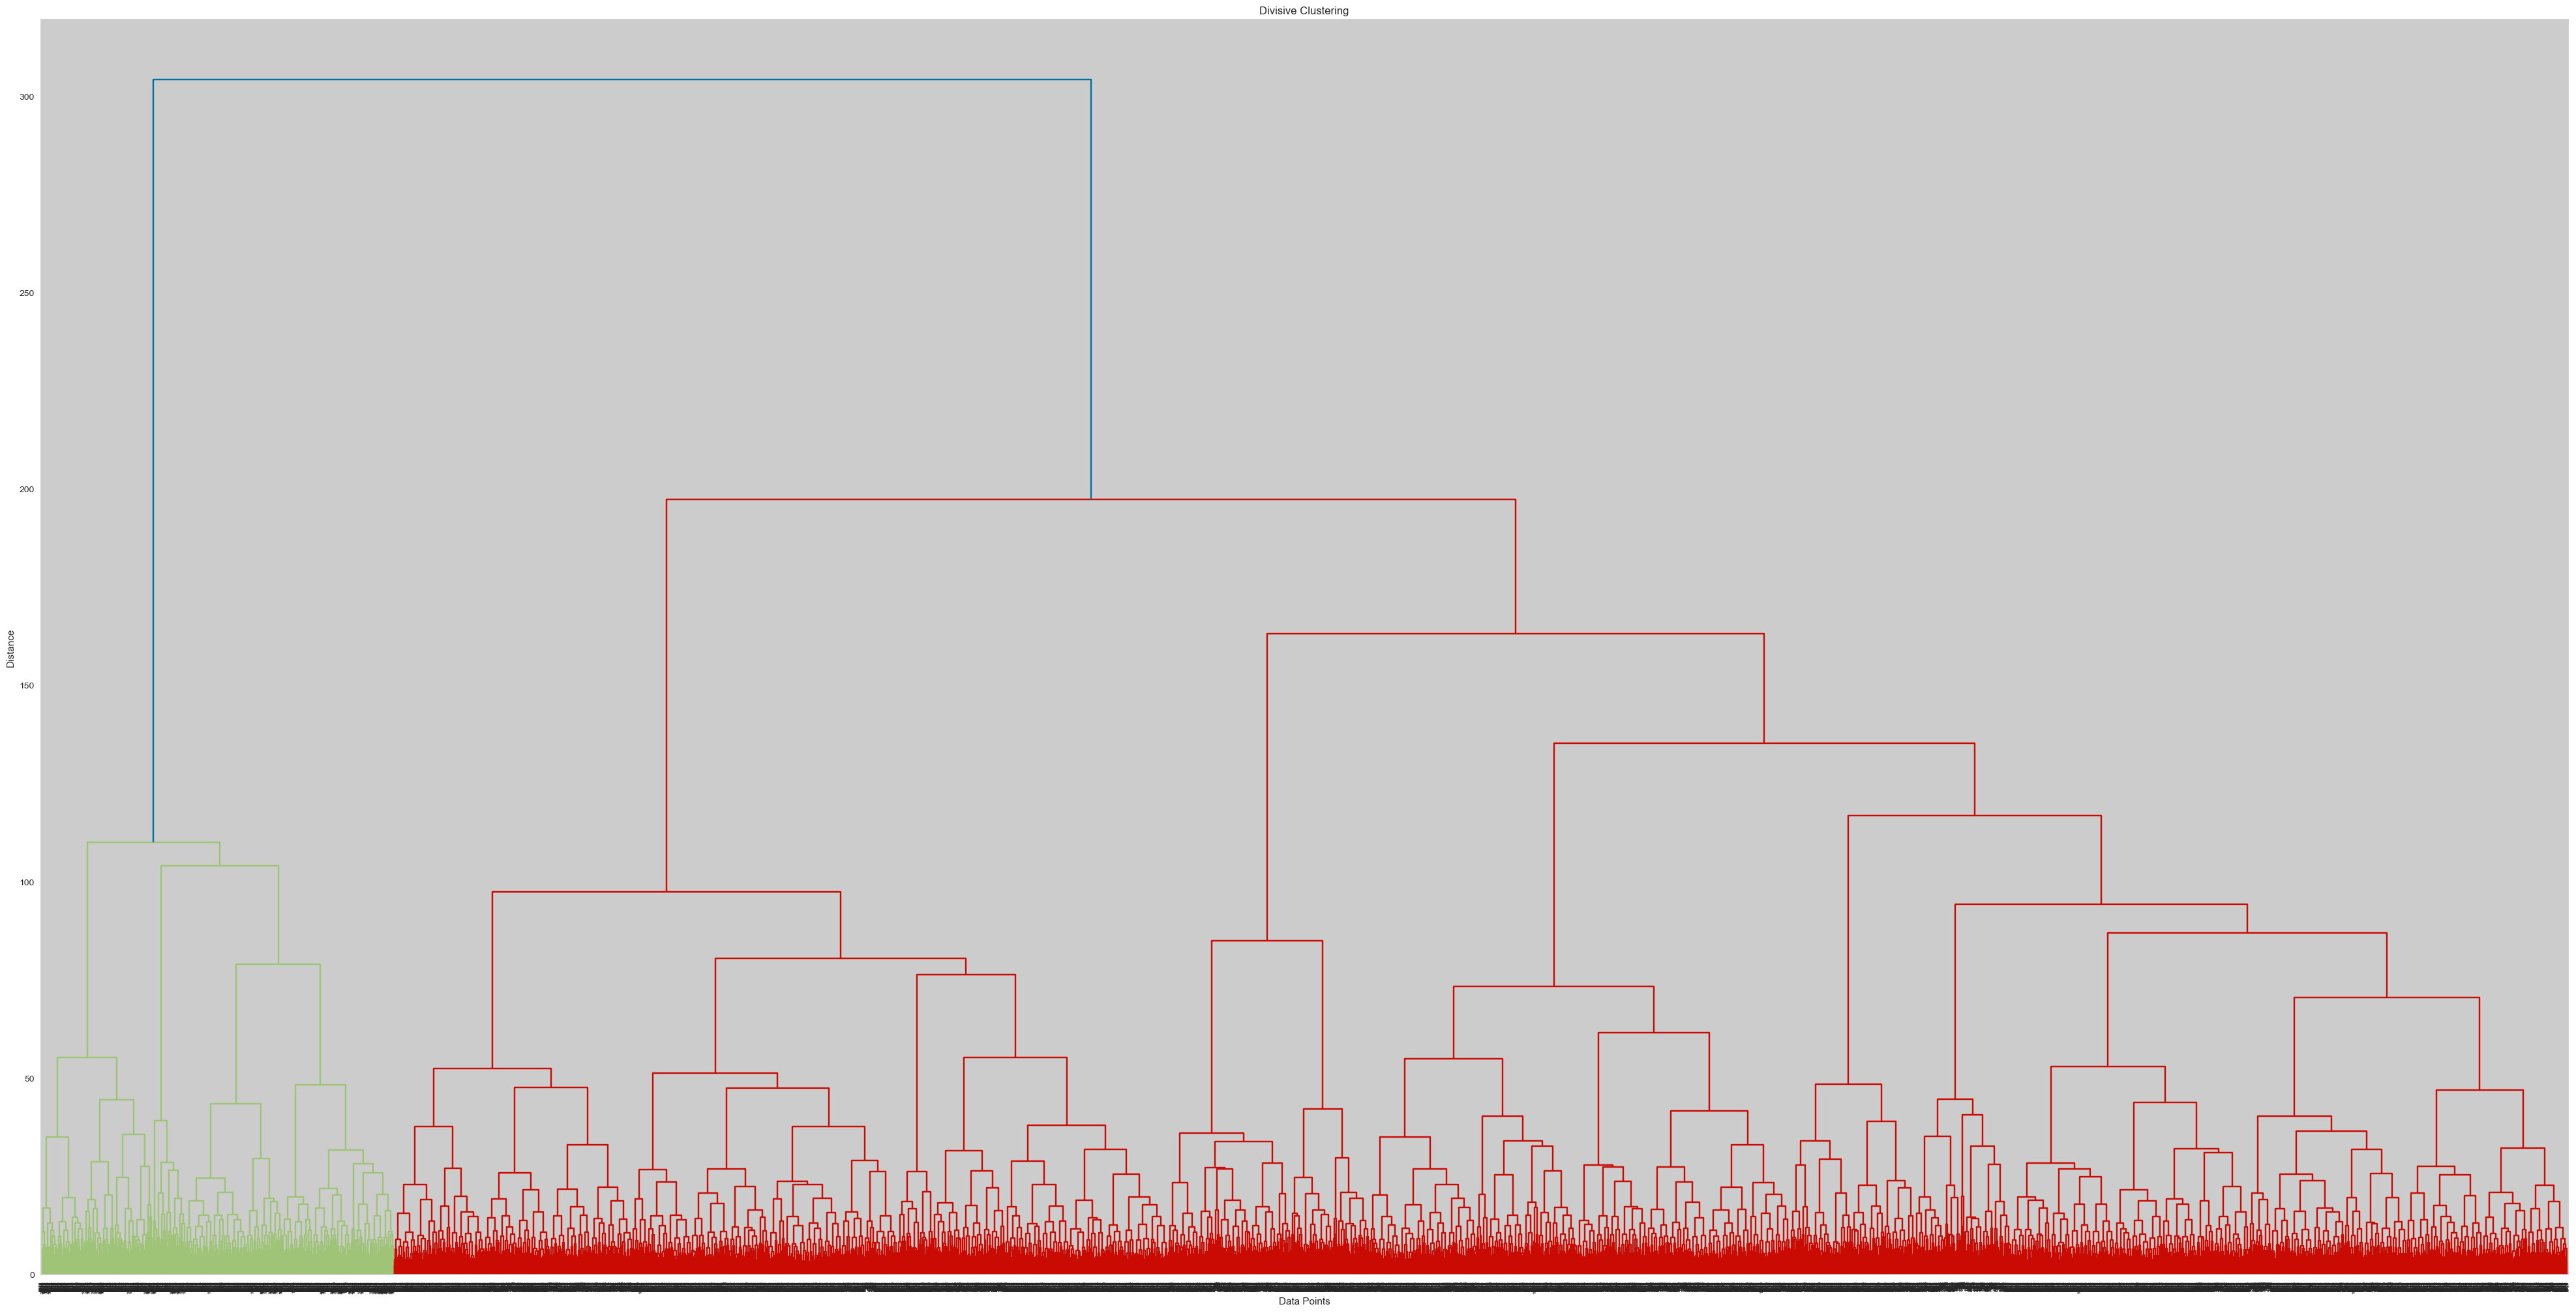

In [33]:
linkage_matrix = linkage(distance_matrix, method = 'ward')
plt.figure(figsize=(50,25));
dendrogram(linkage_matrix);
plt.title("Divisive Clustering");
plt.xlabel("Data Points");
plt.ylabel("Distance");

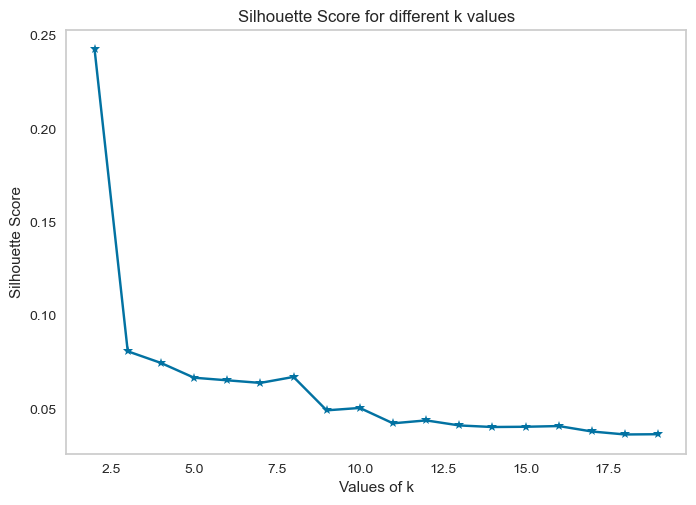

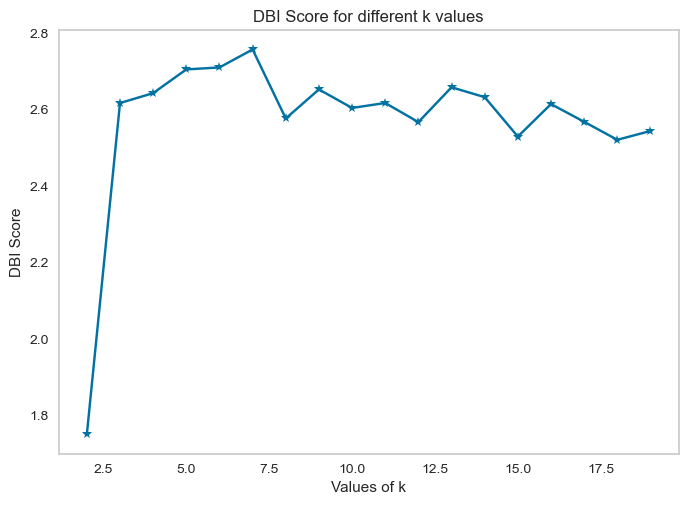

In [34]:
div_ss, div_dbi = [], []

for k in k_range:
    clusters = fcluster(linkage_matrix, t = k, criterion='maxclust')
    div_ss.append(silhouette_score(scaled_data, clusters))
    div_dbi.append(davies_bouldin_score(scaled_data, clusters))
    
plt.plot(k_range, div_ss, marker = '*');
plt.xlabel("Values of k");
plt.ylabel("Silhouette Score");
plt.title("Silhouette Score for different k values");
plt.grid();
plt.show();

plt.plot(k_range, div_dbi, marker = '*');
plt.xlabel("Values of k");
plt.ylabel("DBI Score");
plt.title("DBI Score for different k values");
plt.grid();
plt.show();

### Mean Shift Clustering

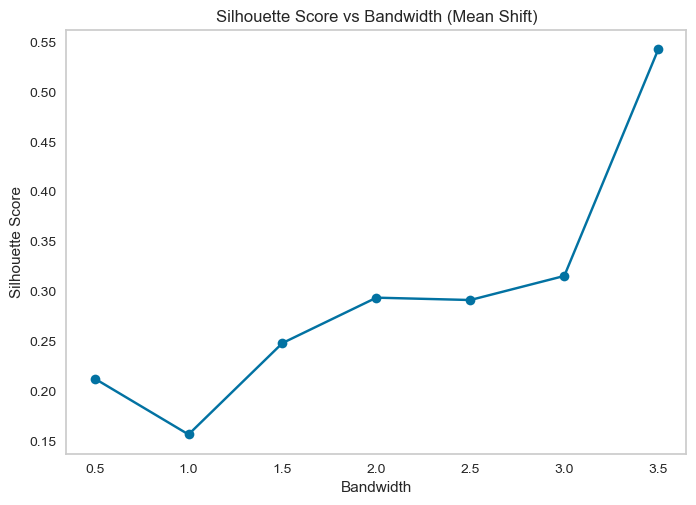

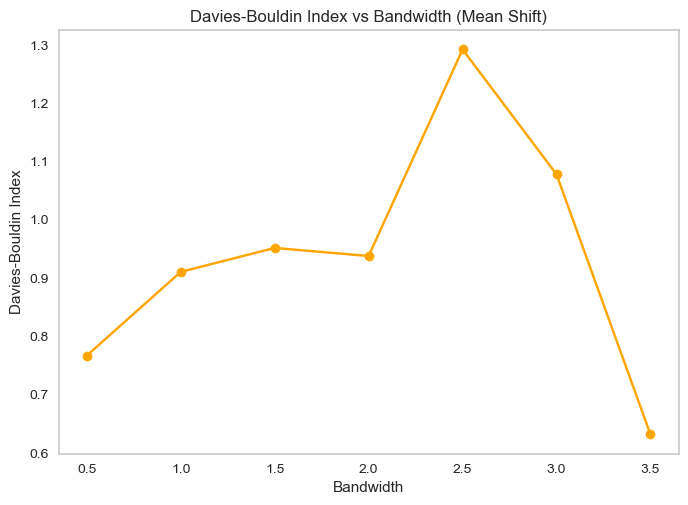

In [46]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# Define bandwidth range to explore
bandwidth_range = np.arange(0.5, 10, 0.5)

ss_meanshift = []
dbi_meanshift = []
bw_values = []

for bw in bandwidth_range:
    try:
        ms = MeanShift(bandwidth=bw, bin_seeding=True)
        labels = ms.fit_predict(PCA_df)

        if len(set(labels)) > 1:
            ss_meanshift.append(silhouette_score(PCA_df, labels))
            dbi_meanshift.append(davies_bouldin_score(PCA_df, labels))
        else:
            ss_meanshift.append(None)
            dbi_meanshift.append(None)
        bw_values.append(bw)
    except Exception as e:
        print(f"Bandwidth {bw}: {e}")
        ss_meanshift.append(None)
        dbi_meanshift.append(None)
        bw_values.append(bw)

# Silhouette Score Plot
plt.plot(bw_values, ss_meanshift, marker='o', label="Silhouette Score")
plt.xlabel("Bandwidth")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Bandwidth (Mean Shift)")
plt.grid()
plt.show()

# Davies-Bouldin Index Plot
plt.plot(bw_values, dbi_meanshift, marker='o', color='orange', label="Davies-Bouldin Index")
plt.xlabel("Bandwidth")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs Bandwidth (Mean Shift)")
plt.grid()
plt.show()


### Check

In [37]:
kmeans_model = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_model.fit(PCA_df)
PCA_df['Clusters'] = kmeans_model.labels_
data['Clusters'] = kmeans_model.labels_
data['Clusters'].value_counts()

Clusters
0    3648
3    3010
2    2331
1    1138
Name: count, dtype: int64

In [38]:
def plot_cluster_distributions(data, cluster_col, num_cols):
    for col in num_cols:
        plt.figure(figsize=(10,5));

        for cluster in data[cluster_col].unique():
            sns.kdeplot(data[data[cluster_col]==cluster][col], label = cluster, linewidth =2)

        plt.title("Distribution of " + col);
        plt.legend();
        plt.grid();
        plt.show();

In [39]:
visualize_cols = set(data.columns.tolist()) - set(['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category', "Clusters"])

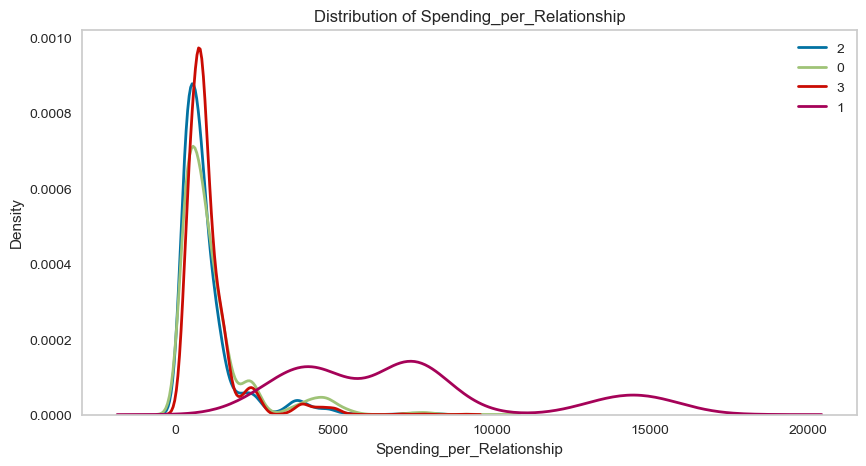

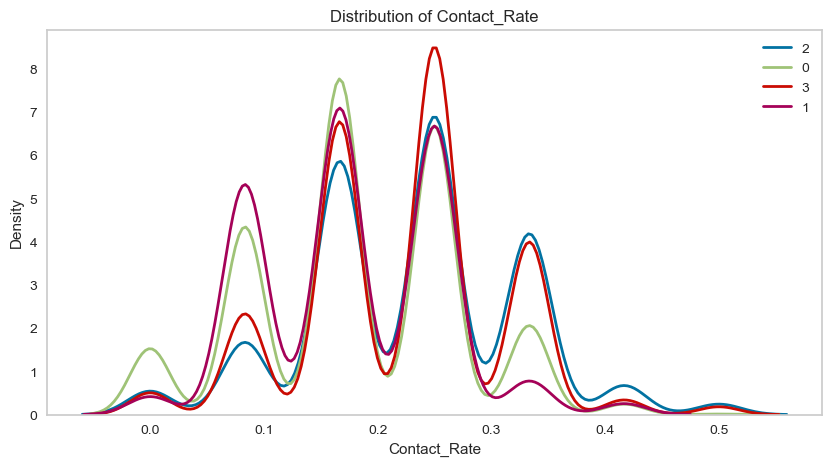

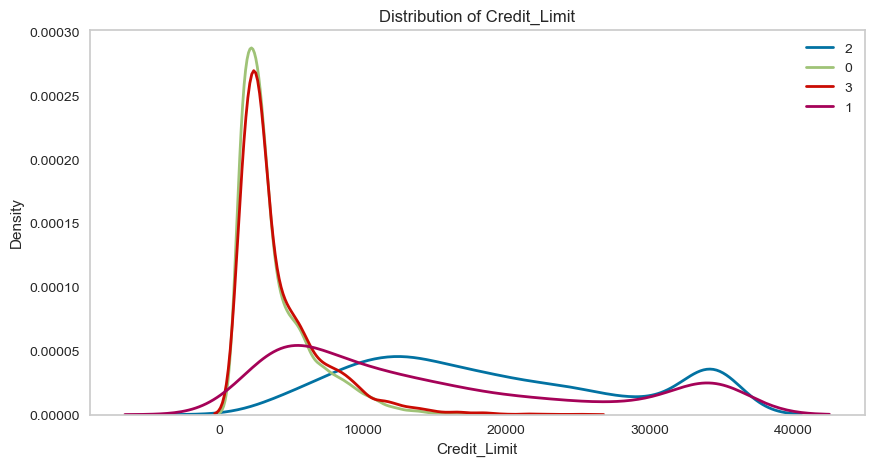

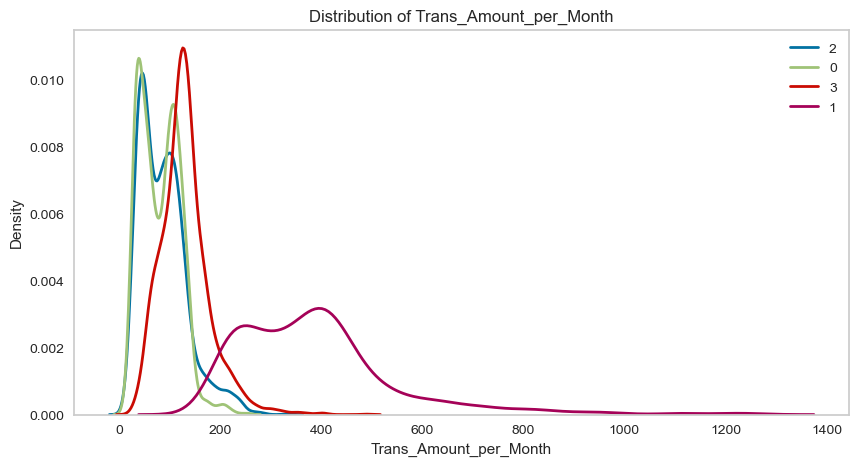

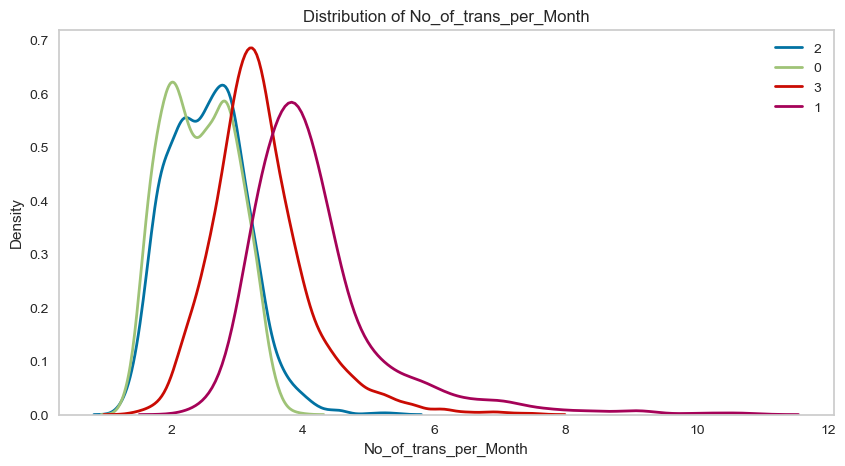

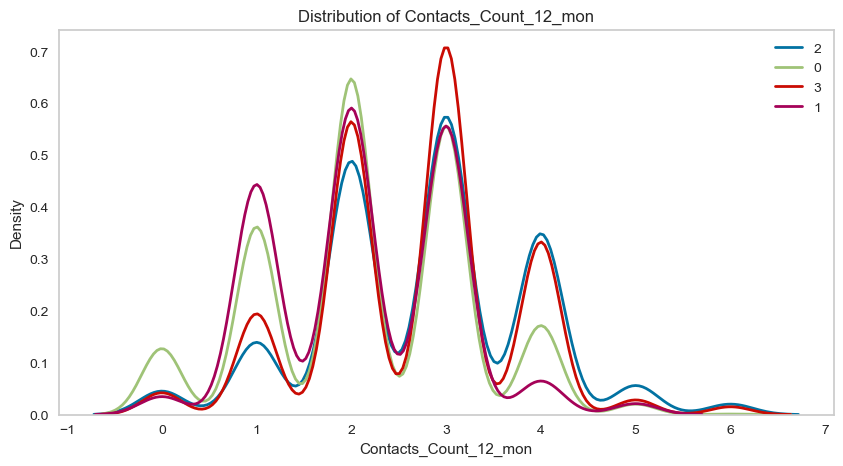

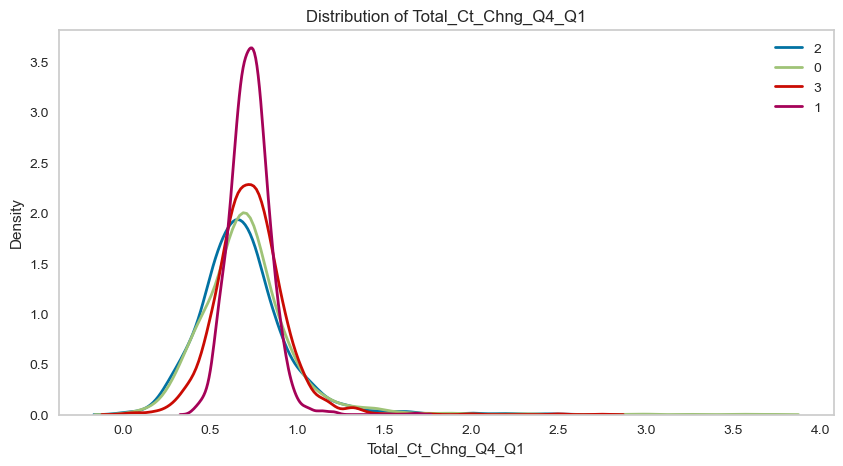

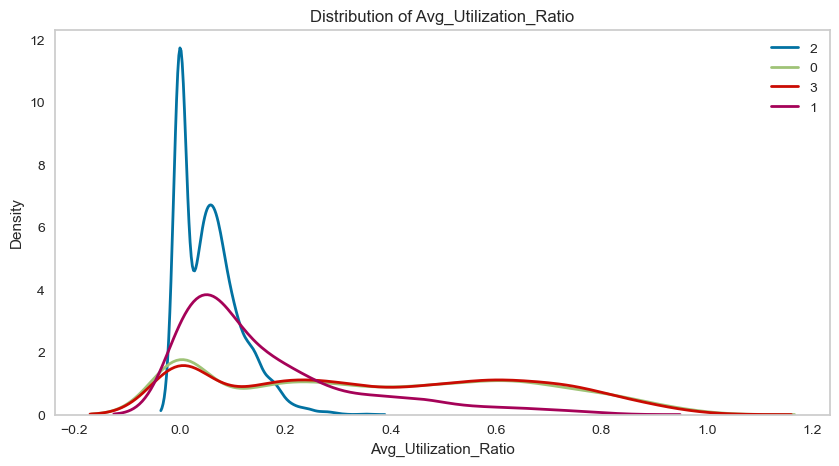

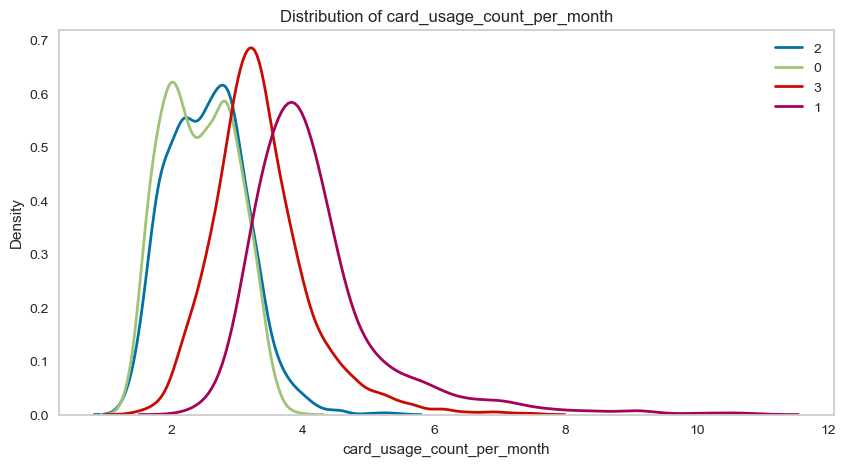

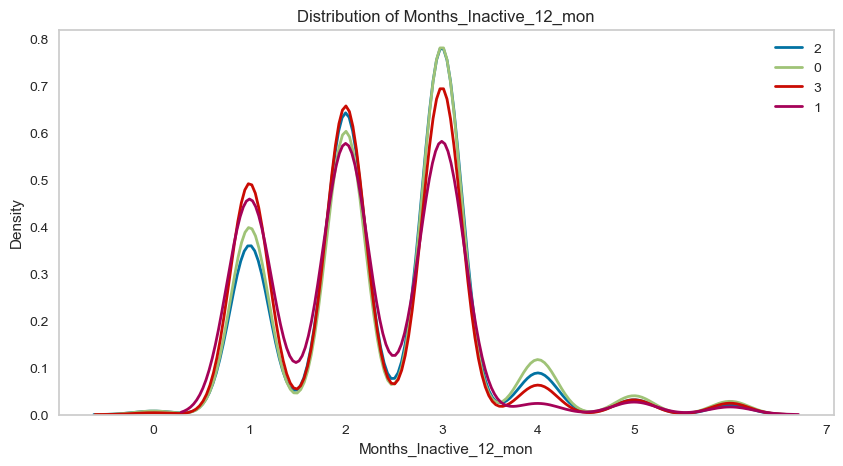

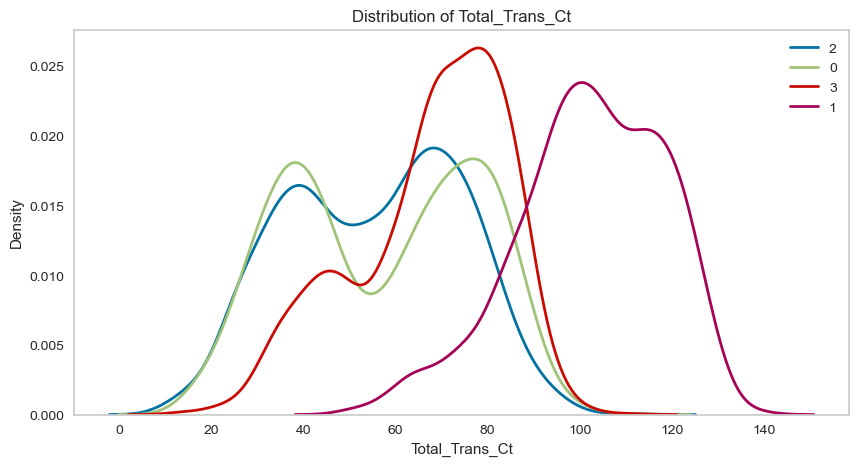

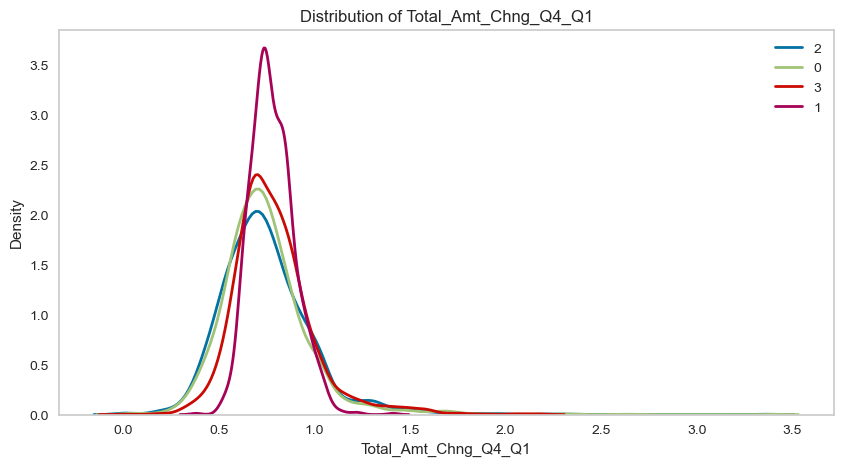

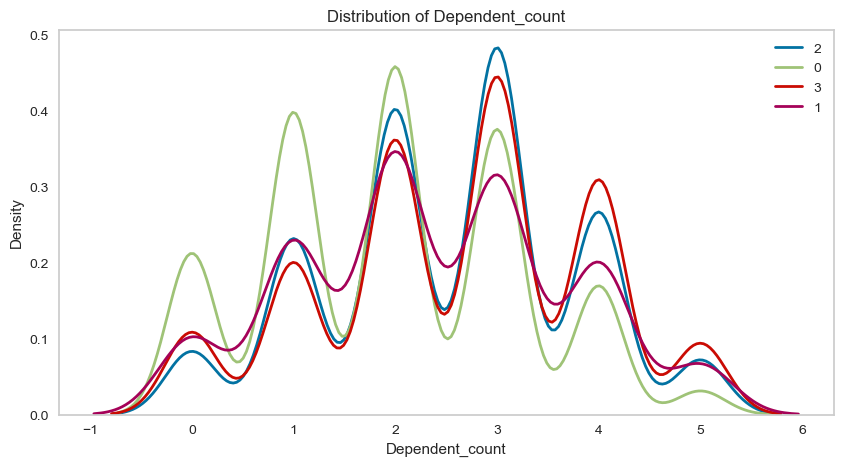

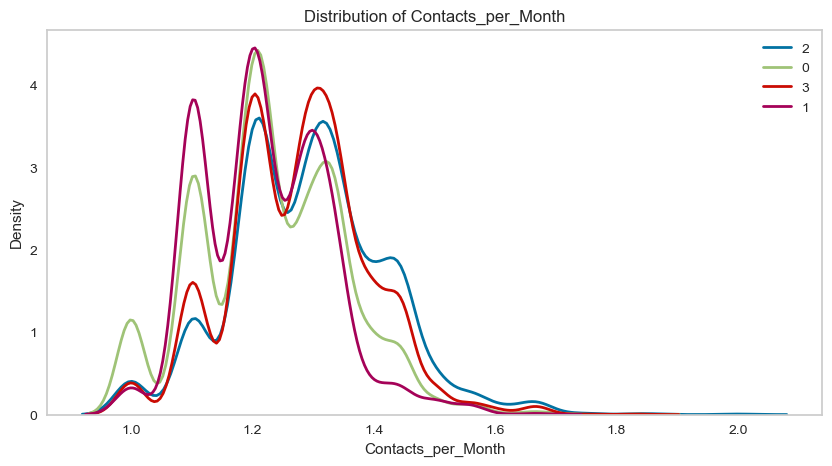

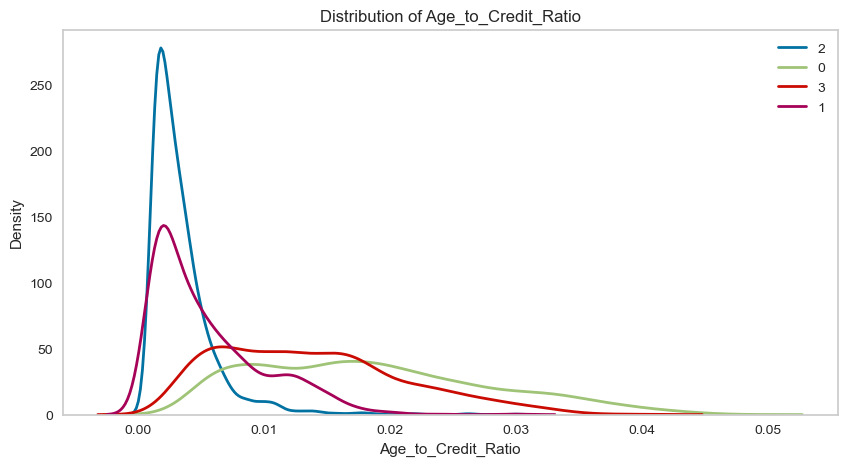

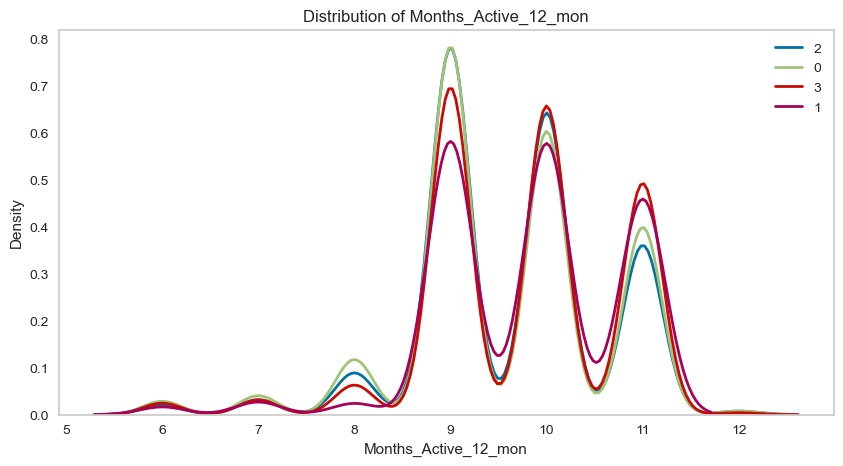

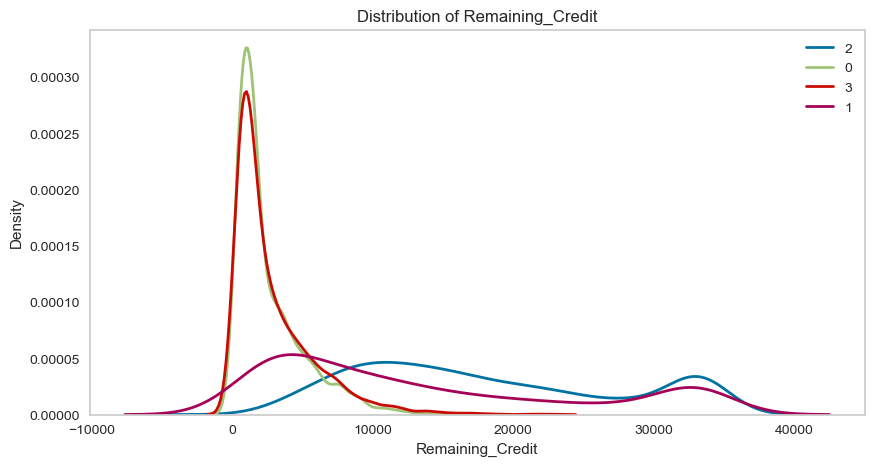

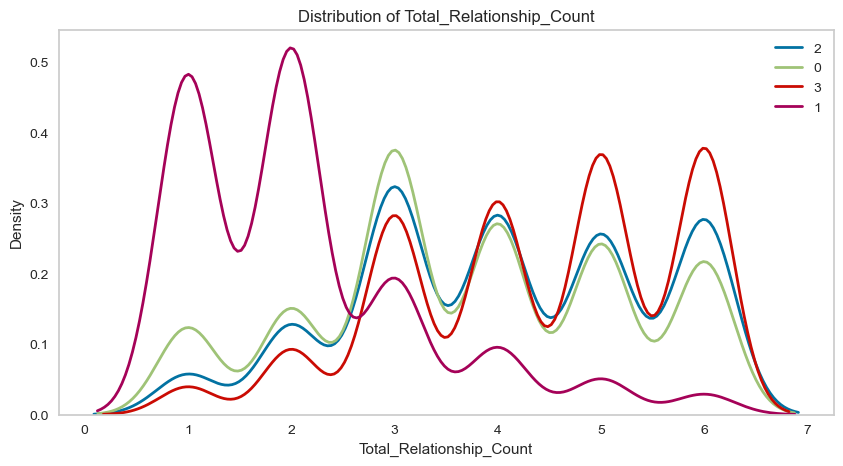

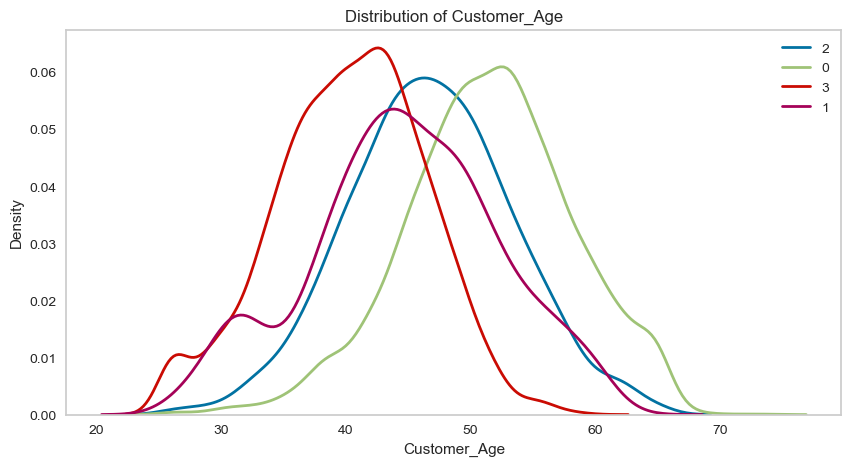

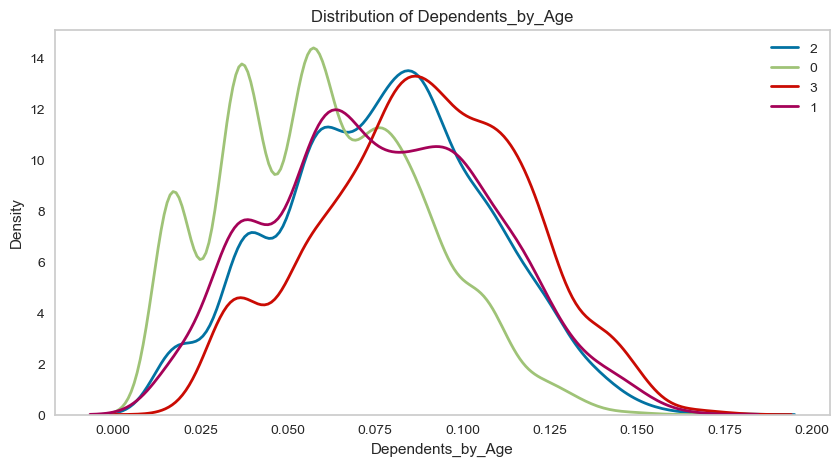

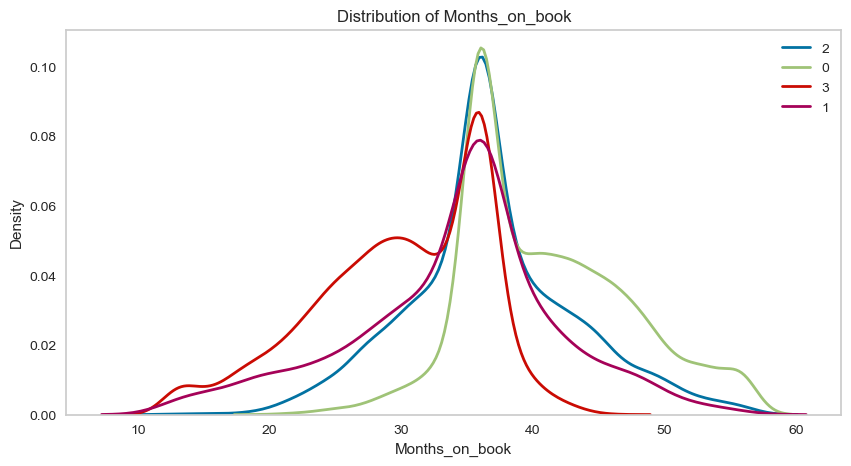

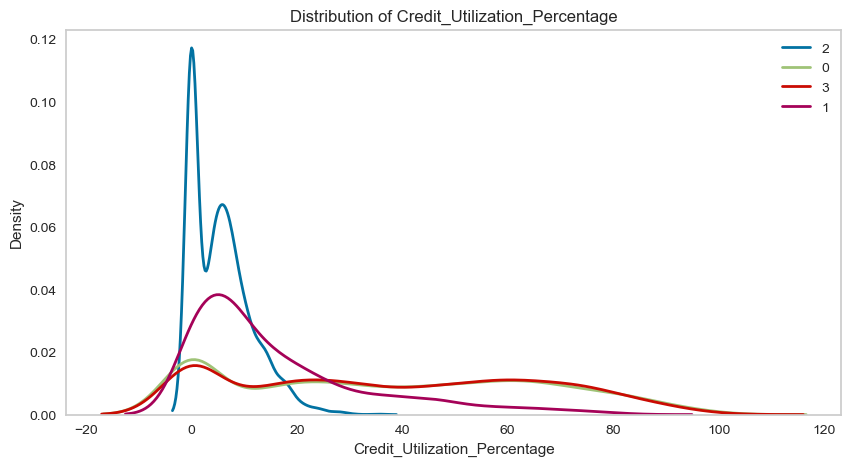

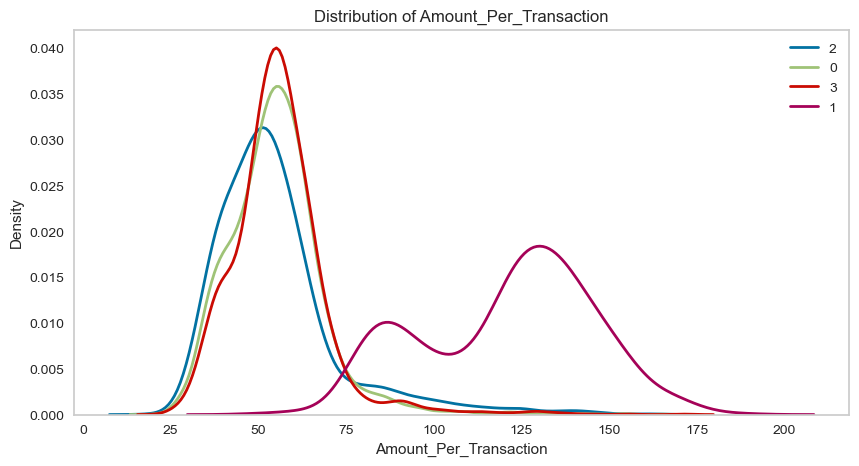

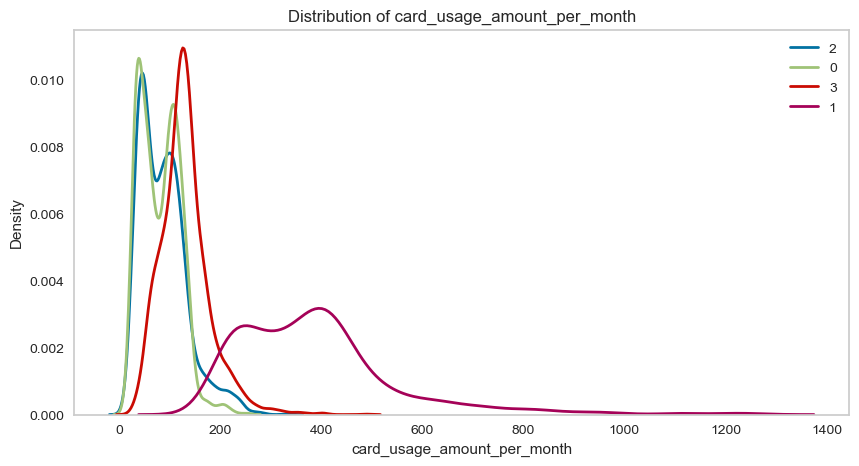

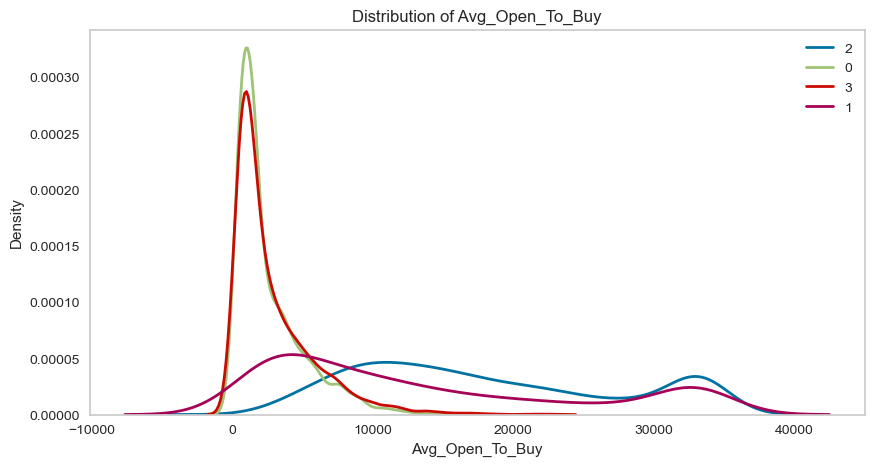

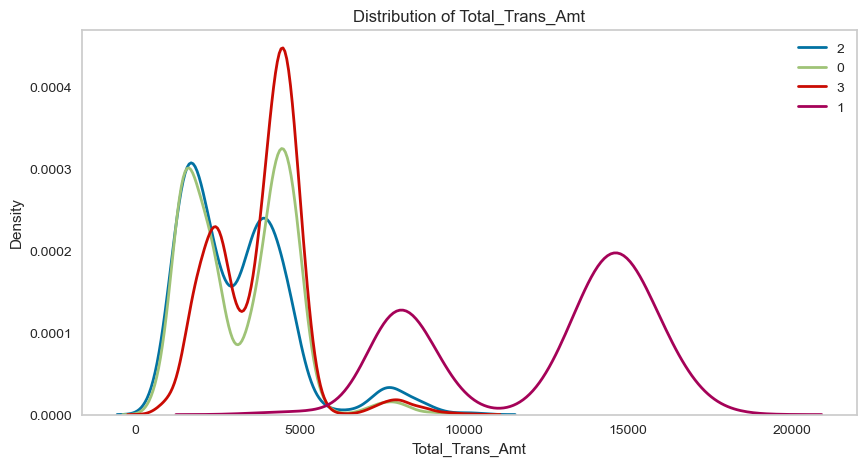

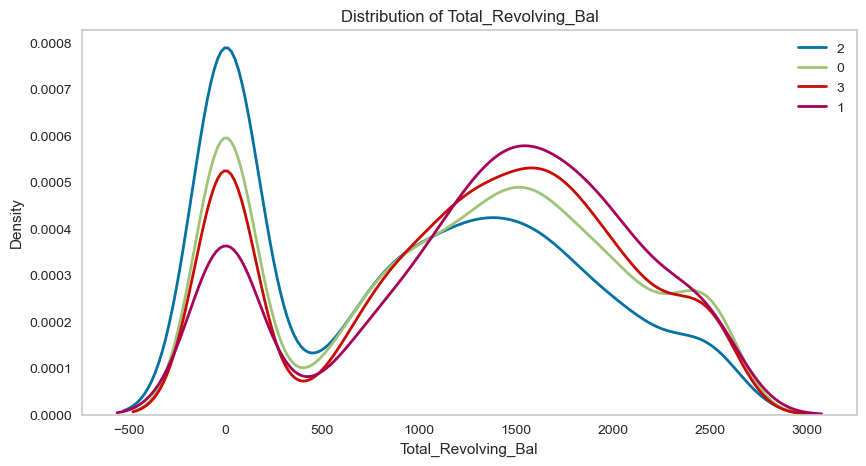

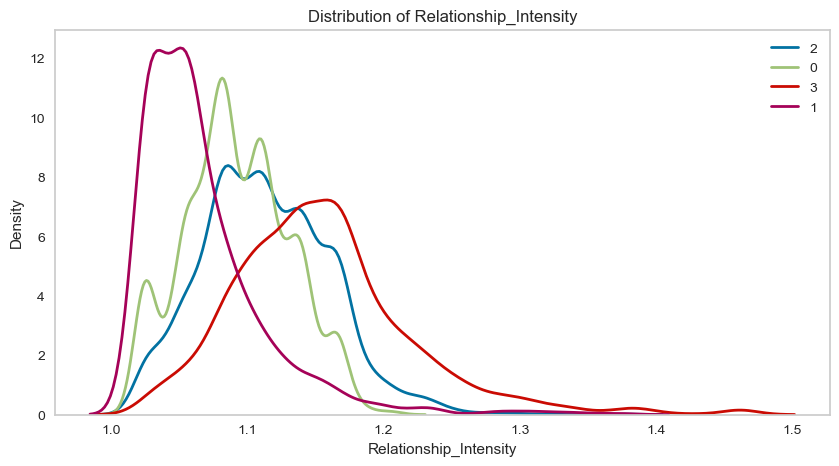

In [40]:
plot_cluster_distributions(data, "Clusters",visualize_cols)

In [41]:
key_cols = ['Customer_Age', 
            'Total_Relationship_Count',
            'Dependents_by_Age',
            'Total_Trans_Amt', 'Trans_Amount_per_Month',
            'Total_Trans_Ct','card_usage_count_per_month',
            'Relationship_Intensity']

print("The Key features for Cluster differenciation are:")
for i in key_cols:
    print(i)

The Key features for Cluster differenciation are:
Customer_Age
Total_Relationship_Count
Dependents_by_Age
Total_Trans_Amt
Trans_Amount_per_Month
Total_Trans_Ct
card_usage_count_per_month
Relationship_Intensity


# **Cluster Interpretation & Naming**



## **Cluster 0: "Cautious Seniors"**  
- **Age:** Oldest customers (~55 years), indicating a financially stable, older demographic.  
- **Total Relationships:** Mostly low (0-3), peaking at 3, suggesting moderate engagement with the credit provider.  
- **Dependents by Age:** Very low (0-0.05), meaning they have fewer dependents relative to their age.  
- **Total Transactions:** Low spending, with peaks at 2000 and 5000, indicating controlled spending habits.  
- **Transaction Amount per Month:** Low values (peaks at 50-100), meaning they use their card occasionally.  
- **Total Transaction Count:** Peaks at 35-40 and 70-80, showing periodic but not frequent spending.  
- **Card Usage per Month:** Low (1-3 times), reinforcing infrequent credit card use.  
- **Relationship Intensity:** Moderate (1.1-1.15), suggesting stable but not highly engaged relationships.  

💡 **Naming:** **"Cautious Seniors"** → Older customers with low spending, limited engagement, and cautious card usage.  

---

## **Cluster 1: "Balanced Mid-Lifers"**  
- **Age:** Mid-range (40-55), normally distributed around 45.  
- **Total Relationships:** Peaks at 3, declining after, suggesting a balanced engagement level.  
- **Dependents by Age:** Moderate (0.05-0.1), implying they have some family responsibilities.  
- **Total Transactions:** Low-to-moderate, with peaks at 1000 and 3000.  
- **Transaction Amount per Month:** Low (peaks at 50 and 100), indicating controlled but steady transactions.  
- **Total Transaction Count:** Moderate, peaking at 40 and 65.  
- **Card Usage per Month:** Low (1-3 times), similar to Cluster 0 but slightly higher.  
- **Relationship Intensity:** Slightly lower than Cluster 0 (1-1.1), meaning they engage less with the credit provider.  

💡 **Naming:** **"Balanced Mid-Lifers"** → Middle-aged customers with moderate spending and engagement levels.  

---

## **Cluster 2: "Young Families"**  
- **Age:** Youngest segment (35-40), indicating early to mid-career professionals.  
- **Total Relationships:** Increases beyond 3, meaning they actively use multiple financial services.  
- **Dependents by Age:** Highest (0.09-0.125), meaning they have more dependents (likely supporting families).  
- **Total Transactions:** Moderate, peaking at 2300 and 5000.  
- **Transaction Amount per Month:** Higher than Clusters 0 & 1 (~100), meaning more frequent purchases.  
- **Total Transaction Count:** Peaks at 70-80, indicating regular card usage.  
- **Card Usage per Month:** Normally distributed with a peak at 3.  
- **Relationship Intensity:** Higher (1.15), suggesting a deeper financial relationship with the credit provider.  

💡 **Naming:** **"Young Families"** → Younger individuals with higher responsibilities, moderate spending, and strong financial engagement.  

---

## **Cluster 3: "High-Spending Professionals"**  
- **Age:** Mid-range (~40), normally distributed.  
- **Total Relationships:** Peaks at 2, sharply declining after, indicating selective financial relationships.  
- **Dependents by Age:** Moderate (0.06-0.08), suggesting some family responsibilities but fewer than Cluster 2.  
- **Total Transactions:** Highest of all clusters, peaking at 8000 and 15000.  
- **Transaction Amount per Month:** Highest of all (~250-400), showing frequent, large transactions.  
- **Total Transaction Count:** Highest (100-120), meaning they use their card very frequently.  
- **Card Usage per Month:** Peaks at 4, reinforcing regular credit card use.  
- **Relationship Intensity:** Lowest (1.05), meaning they don’t rely on the credit provider for multiple services.  

💡 **Naming:** **"High-Spending Professionals"** → High-earning, frequent spenders who use credit cards for large transactions but don’t maintain deep financial relationships.  

---

## **Final Summary**

| **Cluster** | **Age** | **Spending & Transactions** | **Relationships** | **Dependents** | **Card Usage** | **Engagement** |
|------------|--------|---------------------------|------------------|---------------|---------------|--------------|
| **Cautious Seniors** | 55+ | Low, controlled | Moderate (peak at 3) | Very low | Rare (1-3x/month) | Moderate |
| **Balanced Mid-Lifers** | 40-55 | Low-to-moderate | Moderate (peak at 3) | Medium | Rare (1-3x/month) | Low |
| **Young Families** | 35-40 | Moderate | High (3-7) | High | Frequent (3x/month) | High |
| **High-Spending Professionals** | 40 | Very high | Low (1-2) | Medium | Frequent (4x/month) | Low |



# **Product Recommendations Based on Customer Segments**  

## **Cluster 0: Cautious Seniors**  
**Customer Profile:** Older individuals with limited financial relationships, conservative spending habits, and infrequent credit card usage.  

**Recommended Products:**  
- **Low-Maintenance Savings Accounts** – Offer high-interest or senior citizen savings accounts with minimal fees and easy access to funds.  
- **Fixed Deposits & Retirement Investment Plans** – Provide long-term, low-risk investment options such as fixed deposits, annuity plans, and senior citizen-specific retirement funds.  
- **Minimal-Fee Credit Cards** – Recommend credit cards with low or no annual fees and cashback on essential spending such as groceries and healthcare.  
- **Personalized Wealth Management** – Offer advisory services focusing on asset preservation, estate planning, and low-risk investment options.  
- **Medical Insurance & Health Financing** – Provide tailored health insurance plans with senior citizen benefits and easy claim processing.  

---

## **Cluster 1: Balanced Mid-Lifers**  
**Customer Profile:** Middle-aged professionals with moderate financial commitments, steady income, and controlled credit usage.  

**Recommended Products:**  
- **Premium Credit Cards with Cashback & Rewards** – Offer cards that provide cashback or rewards on dining, shopping, and fuel expenses.  
- **Home Loans & Mortgage Advisory** – Provide customized mortgage solutions and home loan refinancing options.  
- **Family-Oriented Insurance Plans** – Suggest life insurance and health coverage plans that cater to dependents and family needs.  
- **Investment in Mutual Funds & SIPs** – Promote systematic investment plans (SIPs) and moderate-risk mutual funds for long-term financial growth.  
- **Salary Accounts with Perks** – Offer salary accounts with benefits such as zero balance, preferential loan rates, and lifestyle rewards.  

---

## **Cluster 2: Young Families**  
**Customer Profile:** Younger individuals managing growing financial responsibilities, frequent credit card transactions, and strong engagement with financial services.  

**Recommended Products:**  
- **Flexible Credit Cards with Higher Limits** – Provide cards with higher credit limits and rewards tailored to everyday spending categories such as groceries, utilities, and child-related expenses.  
- **Child Education & Family Investment Plans** – Offer education savings plans, child insurance policies, and family-oriented financial products.  
- **Auto Loans & Home Loans** – Provide competitive rates on car loans and housing loans to support major life purchases.  
- **Comprehensive Family Health Insurance** – Recommend plans that cover spouse and children, with maternity and pediatric benefits.  
- **Buy Now, Pay Later (BNPL) & EMI-based Financing** – Introduce flexible payment options for essential purchases such as electronics, appliances, and furniture.  

---

## **Cluster 3: High-Spending Professionals**  
**Customer Profile:** High-income professionals with frequent, high-value transactions, selective financial relationships, and independent financial decision-making.  

**Recommended Products:**  
- **Premium & Luxury Credit Cards** – Offer high-limit credit cards with exclusive benefits such as lounge access, concierge services, and international travel perks.  
- **Wealth Management & Private Banking** – Provide personalized wealth advisory, investment management, and tax planning services.  
- **High-Yield Investment Opportunities** – Suggest portfolio management services, high-return mutual funds, and alternative investments such as private equity or hedge funds.  
- **International Banking & Forex Services** – Provide seamless global transactions, low forex conversion fees, and premium foreign currency accounts.  
- **Exclusive Business Banking & Credit Solutions** – Offer tailored financial products for entrepreneurs and business owners, such as corporate credit cards, business loans, and SME financing solutions.  

---

## **Summary of Product Recommendations**  

| **Segment Name** | **Recommended Banking Products** |
|----------------|--------------------------------|
| **Cautious Seniors** | Senior citizen savings accounts, fixed deposits, low-fee credit cards, retirement plans, medical insurance |
| **Balanced Mid-Lifers** | Premium credit cards, home loans, family insurance, SIPs & mutual funds, salary accounts with perks |
| **Young Families** | Flexible credit cards, education & family investment plans, auto/home loans, health insurance, EMI-based financing |
| **High-Spending Professionals** | Luxury credit cards, private banking & wealth management, high-return investments, forex & international banking, business financial services |


In [42]:
# The Key features for 4 Clusters segment differenciation are:
# Customer_Age - AGe of the customer : Range: 20 to 70
        
# Total_Relationship_Count - Total number of relationships customer has with the credit card provider.: Range: 0 to 7
        
# Dependents_by_Age - number of dependent people on the customer divided by their age: Range: 0 to 0.2
# data['Dependents_by_Age'] = (data['Dependent_count']+1 )/ data['Customer_Age']

# Total_Trans_Amt - Total transaction amount. (Integer): Range: 0 to 20000

# Trans_Amount_per_Month - total transaction amount divided by the number of months on book: Range: 0 to 1400
# data['Trans_Amount_per_Month'] = data['Total_Trans_Amt'] / data['Months_on_book']+1

# Total_Trans_Ct - Total transaction count. (Integer): Range: 0 to 150

# card_usage_count_per_month - avereage number of times the card was used in a month: Range: 0 to 12
# data['card_usage_count_per_month'] = data['Total_Trans_Ct'] / data['Months_on_book']+1

# Relationship_Intensity - total relationships with card provided every month: Range: 1 to 1.5
# data['Relationship_Intensity'] = data['Total_Relationship_Count'] / data['Months_on_book']+1




# Cluster 0-
# Customer_Age
# highest of all other clustres, more distributed at higher levels - around 55

# Total_Relationship_Count
# low for Total_Relationship_Count 0,1,2, peaks at 3 and then graduallys decreases from 4,5,6,7

# Dependents_by_Age
# more distributed towards the lower end- peaks between 0 and 0.05 which means has lower noumber of dependents wrt age

# Total_Trans_Amt
# more distributed to the lower ends with peaks near 2000 and 5000

# Trans_Amount_per_Month
# more distributed to the lower ends with peaks near 50 and 100

# Total_Trans_Ct
# more distributed near two peaks - 35-40 and 70-80

# card_usage_count_per_month
# more distributed towards the lower ends around 1 to 3

# Relationship_Intensity
# more distributed around the levels of 1.1 to 1.15




# Cluster 1-
# Customer_Age
# normally distributed around the 45 value, from 40 to 55

# Total_Relationship_Count
# low for Total_Relationship_Count 0,1,2, peaks at 3 and then graduallys decreases from 4,5,6,7

# Dependents_by_Age
# distributed near the center with peaks betwwehn 0.05 and 0.1

# Total_Trans_Amt
# distributed near the lower ends with peaks at 1000 and a smaller peak at 3000

# Trans_Amount_per_Month
# distributed near the lower ends with peaks at 50 and a smaller peak at 100

# Total_Trans_Ct
# distributed near the lower center with peaks at 40 and a smaller peak at 65

# card_usage_count_per_month
# more distributed towards the lower ends around 1 to 3

# Relationship_Intensity
# more distributed around the levels of 1 to 1.1 with peaks lower than cluster 0





# Cluser 2-
# Customer_Age
# loweest of all other clustres, more distributed at lower levels - around 35-40

# Total_Relationship_Count
# low for Total_Relationship_Count 0,1,2, increases at 3 and then graduallys more increase from 4,5,6,7

# Dependents_by_Age
# more distributed towards the higher ends- peaks between 0.09 and 0.125 which means has higher noumber of dependents wrt age

# Total_Trans_Amt
# distributed near the centers with peaks at 2300 and a higher peak at 5000

# Trans_Amount_per_Month
# highest distributed around 100

# Total_Trans_Ct
# highest distributijon between 70 - 80

# card_usage_count_per_month
# normally distributed with one peak at 3

# Relationship_Intensity
# higher values with more distribution around 1.15




# Cluster 3-
# Customer_Age
# normalyy distributed with peaks near 40

# Total_Relationship_Count
# highest for Total_Relationship_Count 1,2, peaks at 2 and then fastly decreases from 3, 4,5,6,7

# Dependents_by_Age
# more distributed at the center- peaks between 0.06 and 0.08

# Total_Trans_Amt
# highest distribution with two peaks - 1 near 8000 and other at 15000


# Trans_Amount_per_Month
# highest distribution with two peaks - 1 near 250 and other at 400

# Total_Trans_Ct
# highest values of all the vclusters with peals distributinn between 100-120


# card_usage_count_per_month
# normally distributed with one peak at 4

# Relationship_Intensity
# lowest of all clusters with highest peak at 1.05